# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [259]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [260]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [261]:
# Скачиваем файлы
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 27.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 18.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 38.4MB/s]


In [262]:
data = pd.read_csv('./train.csv')

In [263]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

1) Посмотрим на случайные строчки

In [264]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [309]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1982,1,19.75,19.75,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),0
2027,68,79.60,5461.45,Male,0,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,One year,No,Credit card (automatic),0
133,55,100.00,5509.30,Female,1,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,1
2734,72,115.55,8425.30,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,0
63,1,48.45,48.45,Female,0,No,No,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0


2) Посмотрим на кол-во незаполненых значений при помощи data.info()

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Построим таблицу с кол-вом nan а каждой колонке при помощи data.isna()

In [266]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

1) Обратим внимание на результат вызова data.info(). Колонку Total spent мы относим к числовым, однако её тип object, значит возможно не все значения числовые. Применим to_numeric к этой колонке, а те значения, что не могут быть переведены в числовой тип, заменим nan (за это отвечает параметр errors = "coerce"). Посмотрим сколько nan

In [267]:
data['TotalSpent'] = pd.to_numeric(data["TotalSpent"], errors="coerce")
data["TotalSpent"].isna().sum()


9

Их 9, значит опасения не были напрасными. Далее надо решить, что делать с этими сторками - их нужно либо удалить, либо заменить значения TotalSpent. Исходя из смысла колонки мне кажется логичным проставить 0 вместо nan в этой колонке.

In [268]:
data["TotalSpent"] = data["TotalSpent"].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Теперь видим, что колонка TotalSpent имеет тип float64 без nan. Теперь можно построить гистограммы для числовых признаков.

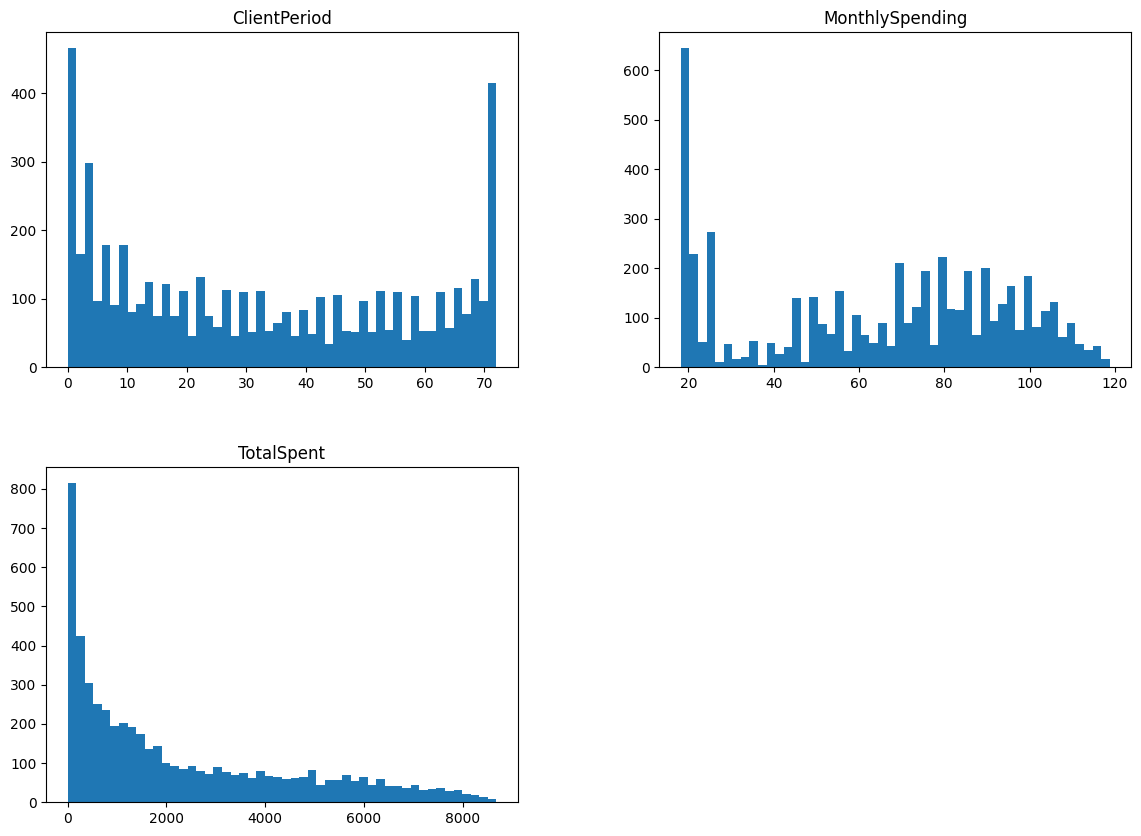

In [269]:
data.hist(column=num_cols, grid = False, figsize=(14, 10), layout = [2, 2], bins = 50)
None

Теперь посмотрим нп распределение категориальных фичей. Для начала посчитаем кол-во значений для каждого из признаков.

In [270]:
# Посмотрим на распределение категориальных фичей
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    print()

Sex DISTRIBUTION
Male      2655
Female    2627
Name: Sex, dtype: int64

IsSeniorCitizen DISTRIBUTION
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64

HasPartner DISTRIBUTION
No     2705
Yes    2577
Name: HasPartner, dtype: int64

HasChild DISTRIBUTION
No     3676
Yes    1606
Name: HasChild, dtype: int64

HasPhoneService DISTRIBUTION
Yes    4761
No      521
Name: HasPhoneService, dtype: int64

HasMultiplePhoneNumbers DISTRIBUTION
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

HasInternetService DISTRIBUTION
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

HasOnlineSecurityService DISTRIBUTION
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

HasOnlineBackup DISTRIBUTION
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dty

Теперь построим в одном графике и гистограммы для числовых признаков, и диаграммы для категориальных. Попробуем сначала bar диаграмму.

<ipython-input-271-cc617ac95e46>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[-1].set_yticklabels(data[cat_cols[j]], rotation=45)
<ipython-input-271-cc617ac95e46>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[-1].set_yticklabels(data[cat_cols[j]], rotation=45)
<ipython-input-271-cc617ac95e46>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[-1].set_yticklabels(data[cat_cols[j]], rotation=45)
<ipython-input-271-cc617ac95e46>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[-1].set_yticklabels(data[cat_cols[j]], rotation=45)
<ipython-input-271-cc617ac95e46>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[-1].set_yticklabels(data[cat_cols[j]], rotation=45)
<ipython-input-271-cc617ac95e46>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[-1].set_yticklabels(data[cat_col

[]

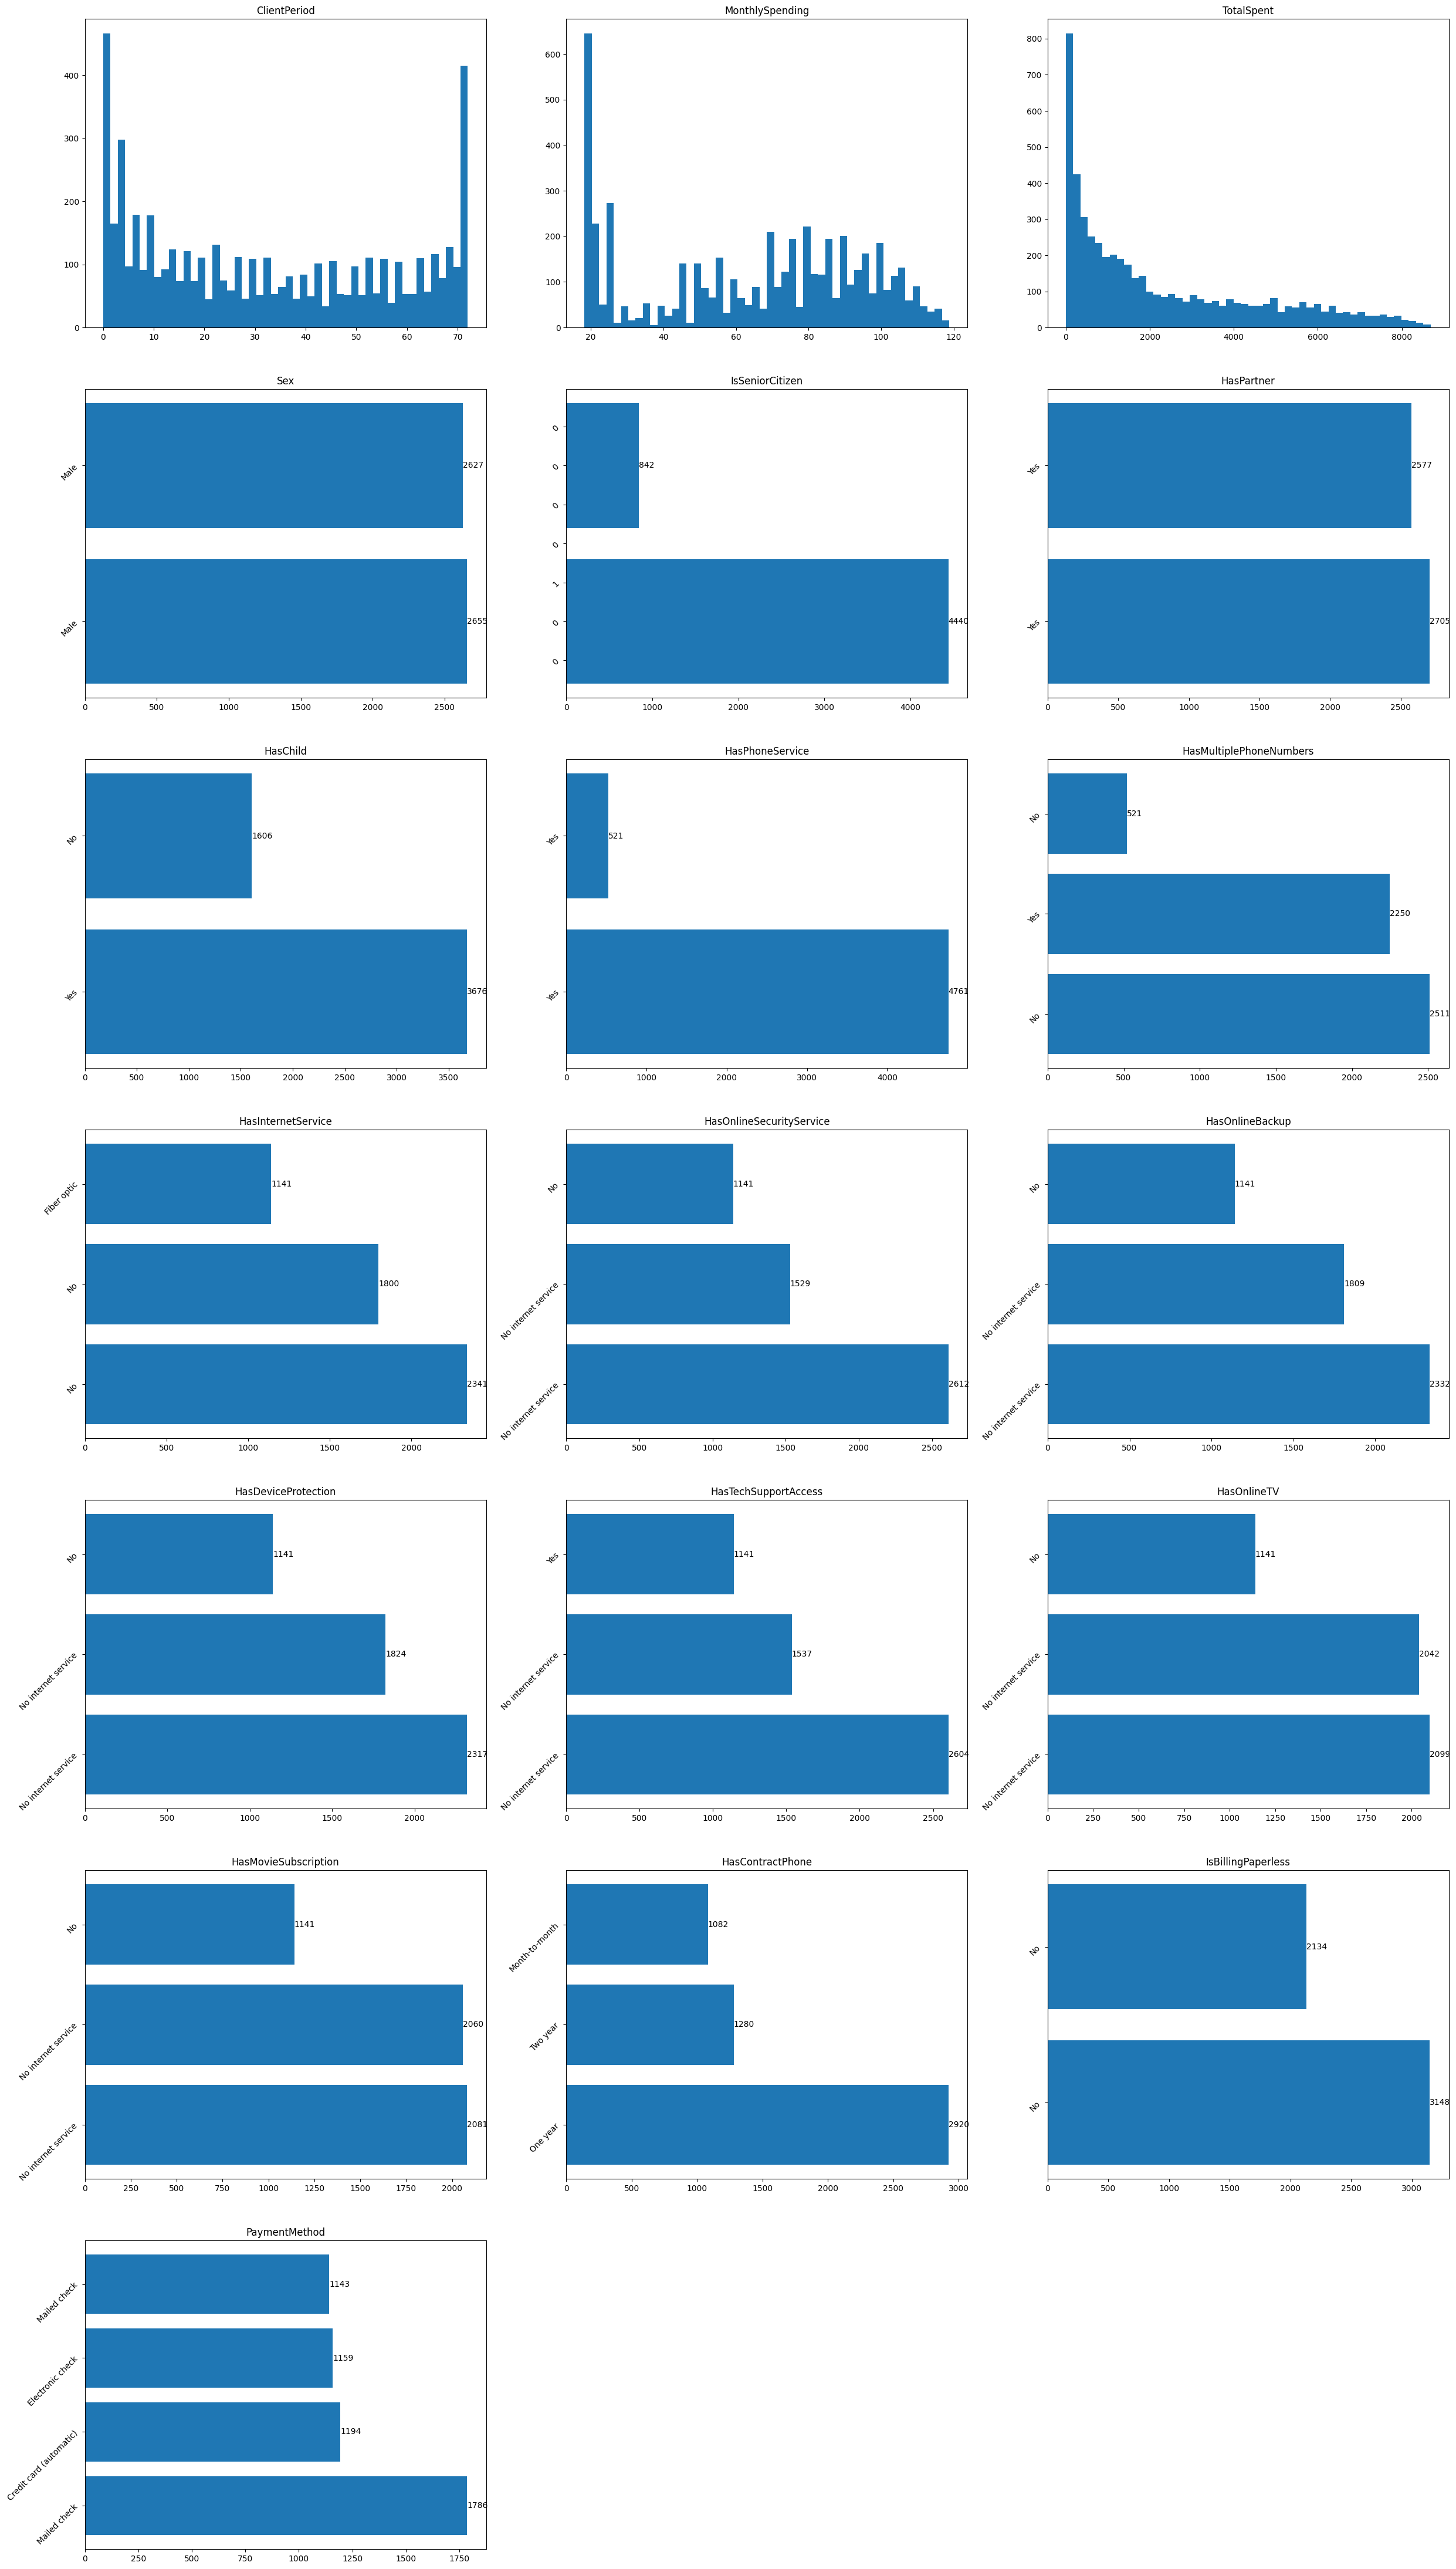

In [271]:
cols = len(num_cols)
rows = len(feature_cols) // len(num_cols) + 1
fig = plt.figure(figsize=(cols * 10, rows * 8))
axs = [plt.subplot(rows, cols, i + 1) for i in range(len(num_cols))]
for i in range(len(num_cols)):
    axs[i].hist(data[num_cols[i]], bins=50)
    axs[i].title.set_text(num_cols[i])
for j in range(len(cat_cols)):
    axs.append(plt.subplot(rows, cols, j + len(num_cols) + 1))
    bar = axs[-1].barh(data[cat_cols[j]].unique(),data[cat_cols[j]].value_counts())
    axs[-1].title.set_text(cat_cols[j])
    axs[-1].bar_label(bar)
    axs[-1].set_yticklabels(data[cat_cols[j]], rotation=45)
plt.plot()

Попробуем теперь диаграмму pie chart

[]

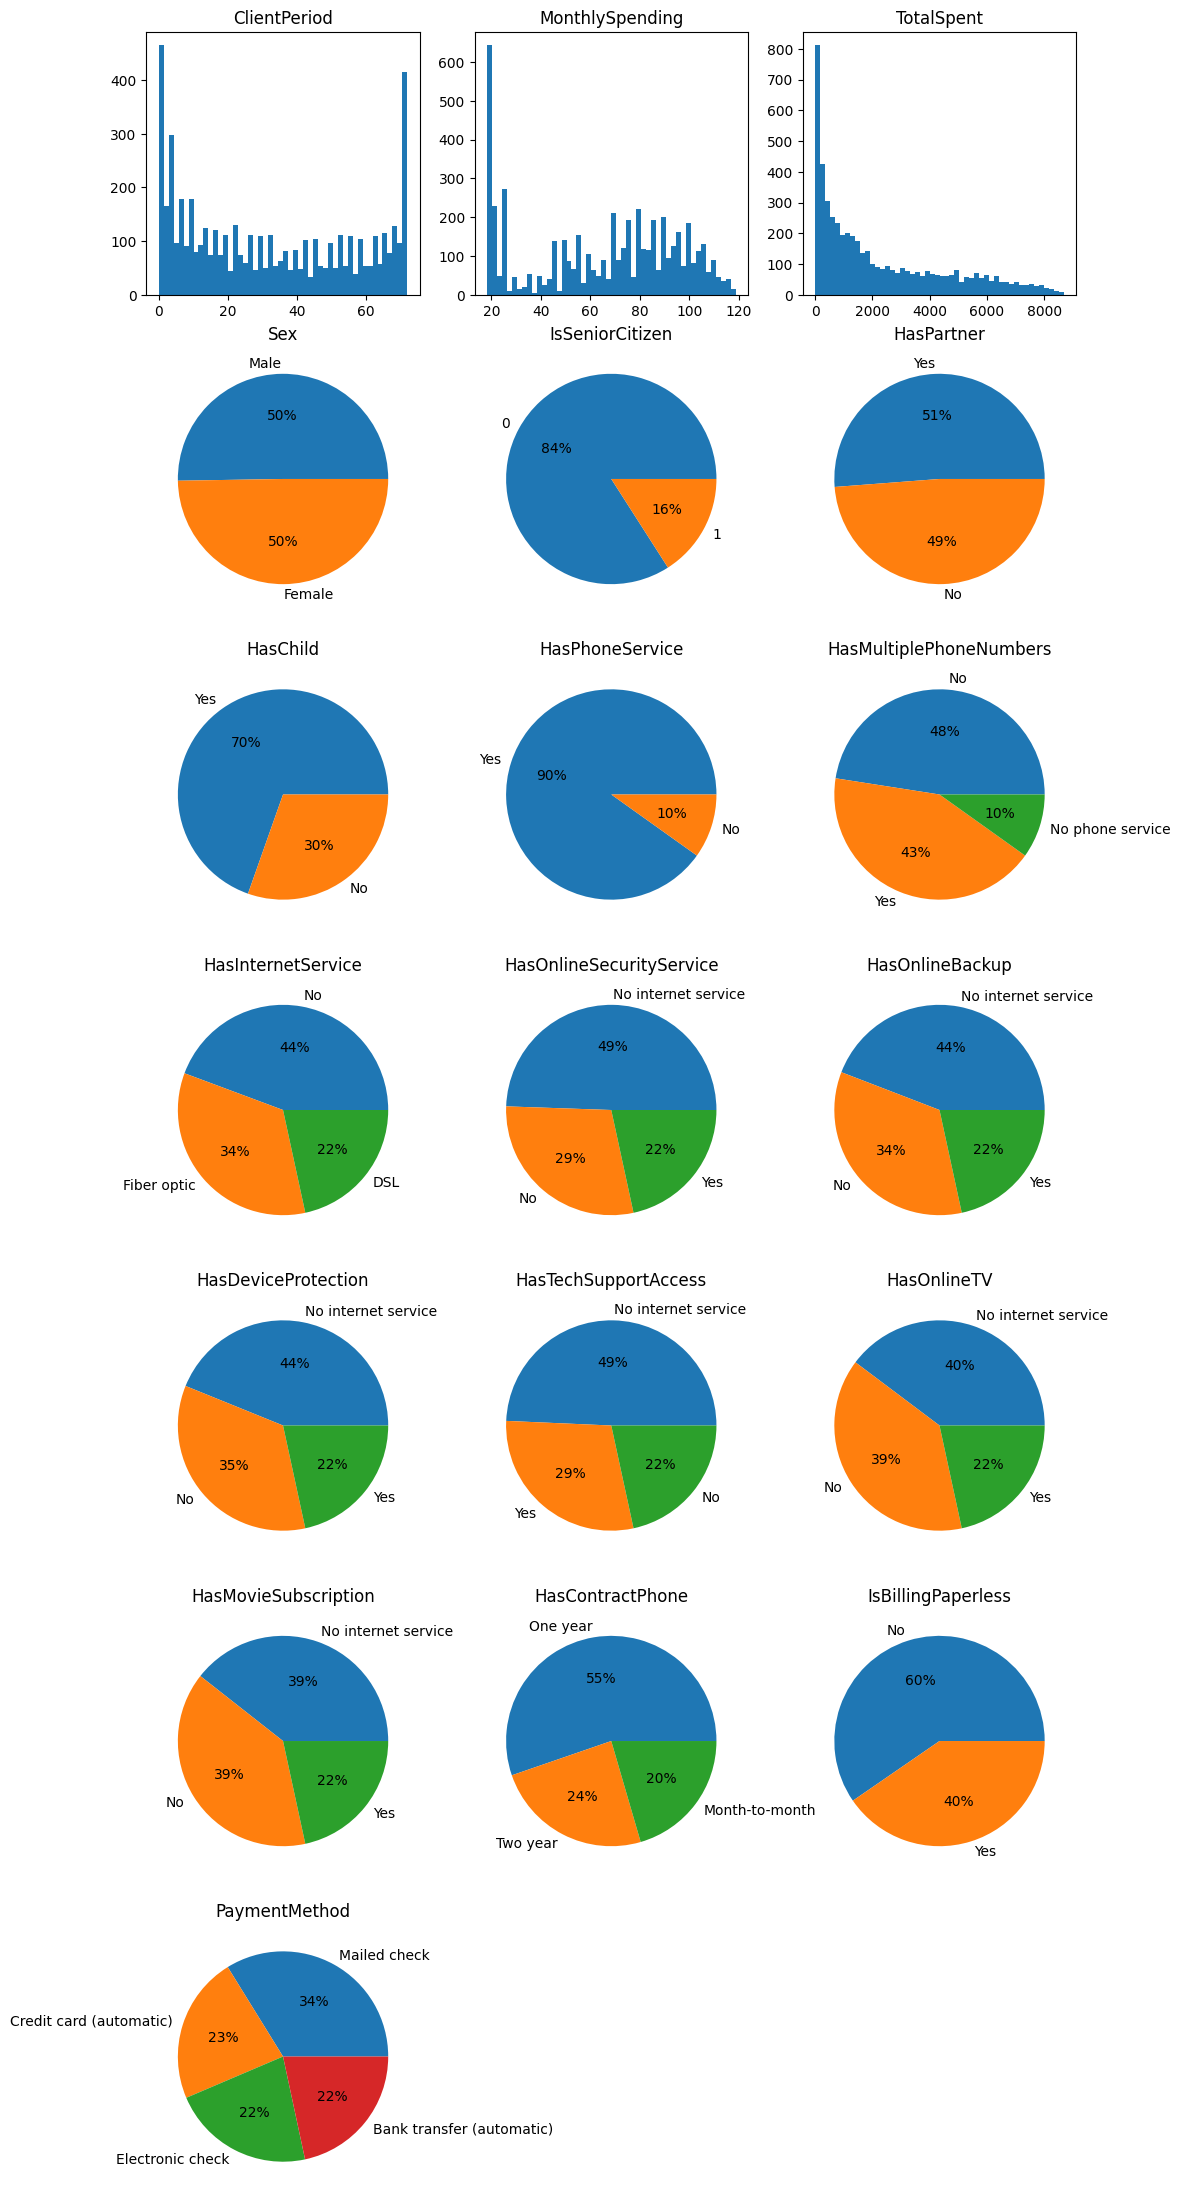

In [272]:
cols = len(num_cols)
rows = len(feature_cols) // len(num_cols) + 1
fig = plt.figure(figsize=(cols * 4, rows * 4))
axs = [plt.subplot(rows, cols, i + 1) for i in range(len(num_cols))]
for i in range(len(num_cols)):
    axs[i].hist(data[num_cols[i]], bins=50)
    axs[i].title.set_text(num_cols[i])
for j in range(len(cat_cols)):
    axs.append(plt.subplot(rows, cols, j + len(num_cols) + 1))
    axs[-1].pie(data[cat_cols[j]].value_counts(), labels=data[cat_cols[j]].unique(), autopct="%.f%%")
    axs[-1].title.set_text(cat_cols[j])
plt.plot()

Посмотрим распределение целевой переменной

In [273]:
print(f"{target_col} DISTRIBUTION")
print(data[target_col].value_counts())

Churn DISTRIBUTION
0    3898
1    1384
Name: Churn, dtype: int64


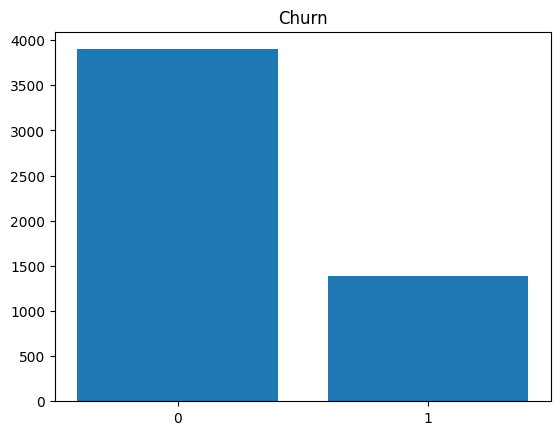

In [274]:
plt.bar(data[target_col].unique(), data[target_col].value_counts())
plt.xticks(data[target_col].unique())
plt.title(target_col)
plt.show()

Несбалансированным класс мог бы счиаться при соотношенни 80:20, чего не наблюдается для нашей целевой переменной

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

Мы уже разобрались с ошибкой в колонке TotalSpent, заменив нечисловые значения на 0

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [275]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Закодируем категориальные признаки

In [276]:
data_encoded = pd.get_dummies(data, columns = cat_cols, drop_first = True)
cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data_encoded.columns))
feature_cols_new = num_cols + cat_cols_new

Разделим выборку на Train и Test

In [277]:
X_train, X_test, y_train, y_test = train_test_split(data_encoded[feature_cols_new], data_encoded[target_col], test_size=0.2, random_state=42)

Отнормируем числовые признаки

In [278]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

В задании просят делать через one-hot-encoding. Это менее удобно, код представлен ниже

In [279]:
X_train_oh, X_test_oh, y_train_oh, y_test_oh = train_test_split(data[feature_cols], data[target_col], test_size=0.2, random_state=42)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
cols_train = pd.DataFrame(encoder.fit_transform(X_train_oh[cat_cols]))
cols_test = pd.DataFrame(encoder.transform(X_test_oh[cat_cols]))
cat_cols_encoded = encoder.get_feature_names_out(cat_cols)

cols_train.index = X_train_oh.index
cols_test.index = X_test_oh.index

numeric_X_train = X_train_oh.drop(cat_cols, axis=1)
numeric_X_test = X_test_oh.drop(cat_cols, axis=1)

cols_train.set_axis(cat_cols_encoded, axis=1,copy=False)
cols_test.set_axis(cat_cols_encoded, axis=1,copy=False)

new_X_train = pd.concat([numeric_X_train, cols_train], axis=1)
new_X_test = pd.concat([numeric_X_test, cols_test], axis=1)

X_train_encoded = pd.get_dummies(X_train_oh, columns = cat_cols, drop_first = True)
cat_cols_oh = []
for col_name in cat_cols:
    cat_cols_oh.extend(filter(lambda x: x.startswith(col_name), X_train_encoded.columns))

Протестируем разные значения гиперпараметра C и выберем лучший (тестируем С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC

In [280]:
log = LogisticRegressionCV(Cs = [10**i for i in range(-3, 3)], scoring='roc_auc', refit=True, random_state=42)
log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100], random_state=42,
                     scoring='roc_auc')

Выведем лучшее качество

In [281]:
log.score(X_test, y_test)

0.8269179265060352

И параметр, с которым оно было достигнуто

In [282]:
log.C_[0]

100.0

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

Установим и импортируем catboost

In [283]:
!pip install Catboost
import catboost

1) Разделим изначальные данные на train и test

In [284]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], test_size=0.2, random_state=42)

Обучим модель catboost со стандартными параметрами (задаём метрику AUC)

In [285]:
cat = catboost.CatBoostClassifier(eval_metric='AUC')
cat.fit(X_train, y_train, cat_features=cat_cols)

Learning rate set to 0.019062
0:	total: 14.9ms	remaining: 14.9s
1:	total: 27.6ms	remaining: 13.8s
2:	total: 40.5ms	remaining: 13.5s
3:	total: 53ms	remaining: 13.2s
4:	total: 68.7ms	remaining: 13.7s
5:	total: 84.8ms	remaining: 14.1s
6:	total: 95.7ms	remaining: 13.6s
7:	total: 102ms	remaining: 12.6s
8:	total: 114ms	remaining: 12.6s
9:	total: 127ms	remaining: 12.6s
10:	total: 140ms	remaining: 12.6s
11:	total: 155ms	remaining: 12.8s
12:	total: 165ms	remaining: 12.5s
13:	total: 180ms	remaining: 12.7s
14:	total: 202ms	remaining: 13.3s
15:	total: 218ms	remaining: 13.4s
16:	total: 234ms	remaining: 13.5s
17:	total: 249ms	remaining: 13.6s
18:	total: 264ms	remaining: 13.6s
19:	total: 274ms	remaining: 13.4s
20:	total: 288ms	remaining: 13.4s
21:	total: 302ms	remaining: 13.4s
22:	total: 314ms	remaining: 13.4s
23:	total: 326ms	remaining: 13.3s
24:	total: 340ms	remaining: 13.3s
25:	total: 352ms	remaining: 13.2s
26:	total: 366ms	remaining: 13.2s
27:	total: 379ms	remaining: 13.2s
28:	total: 386ms	remain

Теперь получим предсказание и score по метрике roc_auc

In [286]:
y_prob = cat.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_prob))

0.823387759625419


Посмотрим какие параметры были использованы

In [287]:
cat.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'AUC',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType

Нас интересует кол-во деревьев (depth=6) и learning_rate(=0.019)

2) Протестируем разные занчения параметра количества деревьев и learning_rate'а и выберем лучшую по метрике ROC-AUC комбинацию. Будем искать около стандартных параметров. Внимание, следующий блок кода выполняется примерно за 10 минут

In [288]:
cat_grid = catboost.CatBoostClassifier(eval_metric='AUC')
pool = catboost.Pool(data = X_train, label = y_train, cat_features=cat_cols)
cat_grid= catboost.CatBoostClassifier(cat_features=cat_cols)
grid = {"learning_rate": [0.01 * i for i in range(1, 11)], "depth": list(range(2, 7))}
cat_grid.grid_search(grid, pool)

Выходные данные были обрезаны до нескольких последних строк (5000).
26:	learn: 0.3881446	test: 0.4326515	best: 0.4325575 (24)	total: 376ms	remaining: 13.6s
27:	learn: 0.3871158	test: 0.4321316	best: 0.4321316 (27)	total: 389ms	remaining: 13.5s
28:	learn: 0.3867830	test: 0.4319244	best: 0.4319244 (28)	total: 395ms	remaining: 13.2s
29:	learn: 0.3849740	test: 0.4320062	best: 0.4319244 (28)	total: 409ms	remaining: 13.2s
30:	learn: 0.3841978	test: 0.4319192	best: 0.4319192 (30)	total: 423ms	remaining: 13.2s
31:	learn: 0.3832809	test: 0.4318289	best: 0.4318289 (31)	total: 436ms	remaining: 13.2s
32:	learn: 0.3828503	test: 0.4318077	best: 0.4318077 (32)	total: 449ms	remaining: 13.2s
33:	learn: 0.3822240	test: 0.4317212	best: 0.4317212 (33)	total: 464ms	remaining: 13.2s
34:	learn: 0.3814074	test: 0.4311400	best: 0.4311400 (34)	total: 477ms	remaining: 13.2s
35:	learn: 0.3800110	test: 0.4304787	best: 0.4304787 (35)	total: 491ms	remaining: 13.2s
36:	learn: 0.3799605	test: 0.4305901	best: 0.4304787

{'params': {'depth': 4, 'learning_rate': 0.06},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
   

Теперь получим предсказание и score по метрике roc_auc

In [289]:
y_prob_grid = cat_grid.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_prob_grid))

0.8189409961119679


И посмотрим параметры

In [290]:
cat_grid.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorder

Видим, что со стандартными параметрами score был лучше. Попробуем использовать кол-во деревьев как в стандартном, то есть 6, и пройдемся более мелкими шагами по learning_rate

Сделаем то же самое ещё раз, но выберем в качестве кол-ва деревьев лучший параметр, а в качестве learning rate пройдемся с более маленьким шагом.

In [291]:
cat_grid = catboost.CatBoostClassifier(eval_metric='AUC')
pool = catboost.Pool(data = X_train, label = y_train, cat_features=cat_cols)
cat_grid= catboost.CatBoostClassifier(cat_features=cat_cols)
grid = {"learning_rate": [0.001 * i for i in range(10, 25)], "depth": [6]}
cat_grid.grid_search(grid, pool)

Выходные данные были обрезаны до нескольких последних строк (5000).
26:	learn: 0.4750054	test: 0.4845966	best: 0.4845966 (26)	total: 352ms	remaining: 12.7s
27:	learn: 0.4717338	test: 0.4818682	best: 0.4818682 (27)	total: 366ms	remaining: 12.7s
28:	learn: 0.4684843	test: 0.4790477	best: 0.4790477 (28)	total: 377ms	remaining: 12.6s
29:	learn: 0.4651951	test: 0.4762971	best: 0.4762971 (29)	total: 390ms	remaining: 12.6s
30:	learn: 0.4622381	test: 0.4736951	best: 0.4736951 (30)	total: 401ms	remaining: 12.5s
31:	learn: 0.4588285	test: 0.4709514	best: 0.4709514 (31)	total: 420ms	remaining: 12.7s
32:	learn: 0.4566969	test: 0.4694080	best: 0.4694080 (32)	total: 432ms	remaining: 12.7s
33:	learn: 0.4549421	test: 0.4681003	best: 0.4681003 (33)	total: 438ms	remaining: 12.5s
34:	learn: 0.4521116	test: 0.4656954	best: 0.4656954 (34)	total: 452ms	remaining: 12.5s
35:	learn: 0.4496758	test: 0.4637422	best: 0.4637422 (35)	total: 463ms	remaining: 12.4s
36:	learn: 0.4472189	test: 0.4615346	best: 0.4615346

{'params': {'depth': 6, 'learning_rate': 0.018000000000000002},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
      

In [292]:
y_prob_grid = cat_grid.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_prob_grid))

0.8245329282145528


In [293]:
cat_grid.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorder

In [294]:
cat_grid = catboost.CatBoostClassifier(eval_metric='AUC')
pool = catboost.Pool(data = X_train, label = y_train, cat_features=cat_cols)
cat_grid= catboost.CatBoostClassifier(cat_features=cat_cols)
grid = {"learning_rate": np.linspace(0.015, 0.020, 10), "depth": [6]}
cat_grid.grid_search(grid, pool)


Выходные данные были обрезаны до нескольких последних строк (5000).
26:	learn: 0.4904807	test: 0.4998917	best: 0.4998917 (26)	total: 328ms	remaining: 11.8s
27:	learn: 0.4873653	test: 0.4967895	best: 0.4967895 (27)	total: 336ms	remaining: 11.7s
28:	learn: 0.4837486	test: 0.4937493	best: 0.4937493 (28)	total: 355ms	remaining: 11.9s
29:	learn: 0.4810460	test: 0.4912978	best: 0.4912978 (29)	total: 372ms	remaining: 12s
30:	learn: 0.4777464	test: 0.4886239	best: 0.4886239 (30)	total: 386ms	remaining: 12.1s
31:	learn: 0.4753394	test: 0.4865722	best: 0.4865722 (31)	total: 394ms	remaining: 11.9s
32:	learn: 0.4725403	test: 0.4840949	best: 0.4840949 (32)	total: 408ms	remaining: 11.9s
33:	learn: 0.4702900	test: 0.4819233	best: 0.4819233 (33)	total: 417ms	remaining: 11.9s
34:	learn: 0.4672126	test: 0.4793271	best: 0.4793271 (34)	total: 431ms	remaining: 11.9s
35:	learn: 0.4647872	test: 0.4773945	best: 0.4773945 (35)	total: 443ms	remaining: 11.9s
36:	learn: 0.4626211	test: 0.4757660	best: 0.4757660 (

{'params': {'depth': 6, 'learning_rate': 0.015555555555555557},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
      

In [295]:
y_prob_grid = cat_grid.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_prob_grid))

0.8274928196082416


In [296]:
cat_grid.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorder

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество - 0.827 с кол-вом деревьев 6 и lr=0.01555. На валидационной выборке лучшей оказалась модель с качеством 0.824, кол-вом деревьев 6 и lr=0.18

# Предсказания

Для модели LogisticRegression

In [297]:
best_model = log

In [298]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

In [299]:
X_test['TotalSpent'] = pd.to_numeric(X_test["TotalSpent"], errors="coerce")
X_test["TotalSpent"] = X_test["TotalSpent"].fillna(0)

In [300]:
X_test = pd.get_dummies(X_test, columns = cat_cols, drop_first = True)
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [301]:
submission['Churn'] = best_model.predict_proba(X_test)[:, 1] #/ best_model.predict(X_test)

In [302]:
submission.to_csv('./my_submission.csv', index=False)

Для Catboost

In [303]:
model = cat_grid

In [304]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

In [305]:
submission['Churn'] = model.predict_proba(X_test)[:, 1]

In [306]:
submission.to_csv('./my_submission.csv', index=False)

In [307]:
cat_grid.save_model('cat_grid', format='json')

Лучшее решение отправьте в Stepik.